Given the rising cases of Covid-19 cases in the world, there is a need to analyze the covid-19 data and see which countries are most affected.  

Additionally, there is a need to analyze the covid-19 pandemic in Kenya to see the impact of the relaxation of covid-19 safety measures that took place in September, 2020.

# Import our Libraries

In [71]:
# import the python libraries we will be using for this analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

In [41]:
# set the SettingWith CopyWarning Off
pd.options.mode.chained_assignment = None

# Load Our Datasets

In [42]:
# load the grand electors dataset
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
covid = pd.read_csv(url)
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


# Accessing Information about our Datasets

In [43]:
# let us get general information about our dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62590 entries, 0 to 62589
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            62263 non-null  object 
 1   continent                           61935 non-null  object 
 2   location                            62590 non-null  object 
 3   date                                62590 non-null  object 
 4   total_cases                         53615 non-null  float64
 5   new_cases                           62458 non-null  float64
 6   new_cases_smoothed                  61502 non-null  float64
 7   total_deaths                        45617 non-null  float64
 8   new_deaths                          62458 non-null  float64
 9   new_deaths_smoothed                 61502 non-null  float64
 10  total_cases_per_million             53303 non-null  float64
 11  new_cases_per_million               62131

In [44]:
# let us now see the shape of our dataframe
covid.shape

(62590, 50)

# Cleaning the Dataset

In [45]:
# Dropping unnecesary columns
covid1 = covid.drop(['new_deaths_smoothed','new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million',\
                    'reproduction_rate','weekly_icu_admissions_per_million', 'hosp_patients_per_million','weekly_hosp_admissions_per_million', 'new_tests_smoothed', \
                    'new_tests_smoothed_per_thousand','stringency_index','female_smokers','male_smokers','life_expectancy','human_development_index', 'icu_patients',\
                     'icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',\
                     'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_cases_per_million','new_cases_per_million','total_deaths_per_million',\
                     'new_deaths_per_million','population_density','gdp_per_capita','extreme_poverty','tests_units','tests_per_case','new_tests','new_tests_per_thousand',\
                     'hospital_beds_per_thousand'], axis = 1)
covid1.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,total_tests_per_thousand,positive_rate,population,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746


In [46]:
# rename the location column to country
covid1.rename(columns = {'location': 'country'}, inplace= True)
covid1.head()

,iso_code,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,total_tests_per_thousand,positive_rate,population,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746


In [47]:
#checking the shape of our dataset after dropping columns
covid1.shape

(62590, 18)

In [48]:
# Changing the date column to pandas datetime format
covid1['date']= pd.to_datetime(covid1['date'])
covid1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62590 entries, 0 to 62589
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  62263 non-null  object        
 1   continent                 61935 non-null  object        
 2   country                   62590 non-null  object        
 3   date                      62590 non-null  datetime64[ns]
 4   total_cases               53615 non-null  float64       
 5   new_cases                 62458 non-null  float64       
 6   total_deaths              45617 non-null  float64       
 7   new_deaths                62458 non-null  float64       
 8   total_tests               25133 non-null  float64       
 9   total_tests_per_thousand  25133 non-null  float64       
 10  positive_rate             26401 non-null  float64       
 11  population                62263 non-null  float64       
 12  median_age        

In [49]:
# Check for duplicates in our dataset
covid1.duplicated().sum()

0

In [50]:
# Check for null values in our dataset
null = covid1.isnull().sum()
null

iso_code                      327
continent                     655
country                         0
date                            0
total_cases                  8975
new_cases                     132
total_deaths                16973
new_deaths                    132
total_tests                 37457
total_tests_per_thousand    37457
positive_rate               36189
population                    327
median_age                   3270
aged_65_older                3931
aged_70_older                3597
cardiovasc_death_rate        2367
diabetes_prevalence          1642
handwashing_facilities      31483
dtype: int64

In [51]:
# output all null values
null_covid = covid1[covid1.isnull().any(axis = 1)]
null_covid

,iso_code,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,total_tests_per_thousand,positive_rate,population,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,0.0,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,597.029,9.59,37.746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62373,ZWE,Africa,Zimbabwe,2020-05-12,36.0,0.0,4.0,0.0,11058.0,0.744,NaN,14862927.0,19.6,2.822,1.882,307.846,1.82,36.791
62375,ZWE,Africa,Zimbabwe,2020-05-14,37.0,0.0,4.0,0.0,NaN,NaN,0.001,14862927.0,19.6,2.822,1.882,307.846,1.82,36.791
62387,ZWE,Africa,Zimbabwe,2020-05-26,56.0,0.0,4.0,0.0,NaN,NaN,0.005,14862927.0,19.6,2.822,1.882,307.846,1.82,36.791
62489,ZWE,Africa,Zimbabwe,2020-09-05,6837.0,0.0,206.0,0.0,NaN,NaN,0.075,14862927.0,19.6,2.822,1.882,307.846,1.82,36.791


# Analysis

### Spread of Covid-19 cases Worldwide

In [ ]:
# let us see how Covid-19 has spread throughout the world 
fig = px.choropleth(covid1, locations = 'country', locationmode= 'country names',
                    color = 'total_cases', animation_frame = covid1.date.astype(str))
fig.show()

In [ ]:
# let us also see the deaths caused by covid-19 throughout the world
fig1 = px.choropleth(covid1, locations = 'country', locationmode= 'country names',
                    color = 'total_deaths', animation_frame = covid1.date.astype(str))
fig1.show()

### Cases per Continent

In [ ]:
# let us find out how many covid-19 cases each continent has recorded
continent = covid1.groupby('continent')[['new_cases']].sum().sort_values('new_cases', ascending= False).reset_index()
continent

,continent,new_cases
0,Europe,20118441.0
1,Asia,19212931.0
2,North America,19097879.0
3,South America,11996890.0
4,Africa,2390319.0
5,Oceania,30939.0


Text(0, 0.5, 'Cases (in Millions')

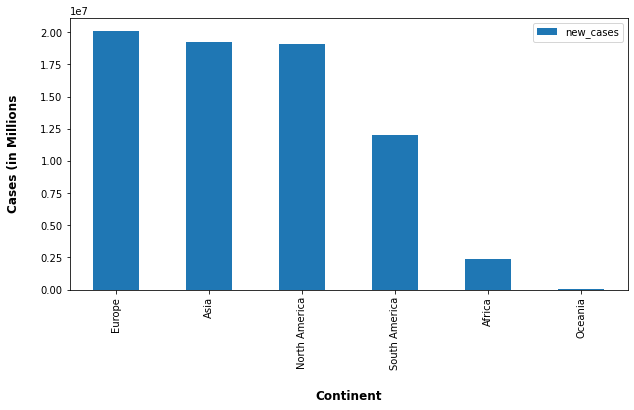

In [69]:
# let us now visually represent this inormation on a bar graph
graph = continent.plot.bar(x='continent', y='new_cases', figsize=(10,5))
# Set x-axis label
graph.set_xlabel("Continent", labelpad=20, weight='bold', size=12)

  # Set y-axis label
graph.set_ylabel("Cases (in Millions", labelpad=20, weight='bold', size=12)

### Cases Per Country

Text(0, 0.5, 'Country')

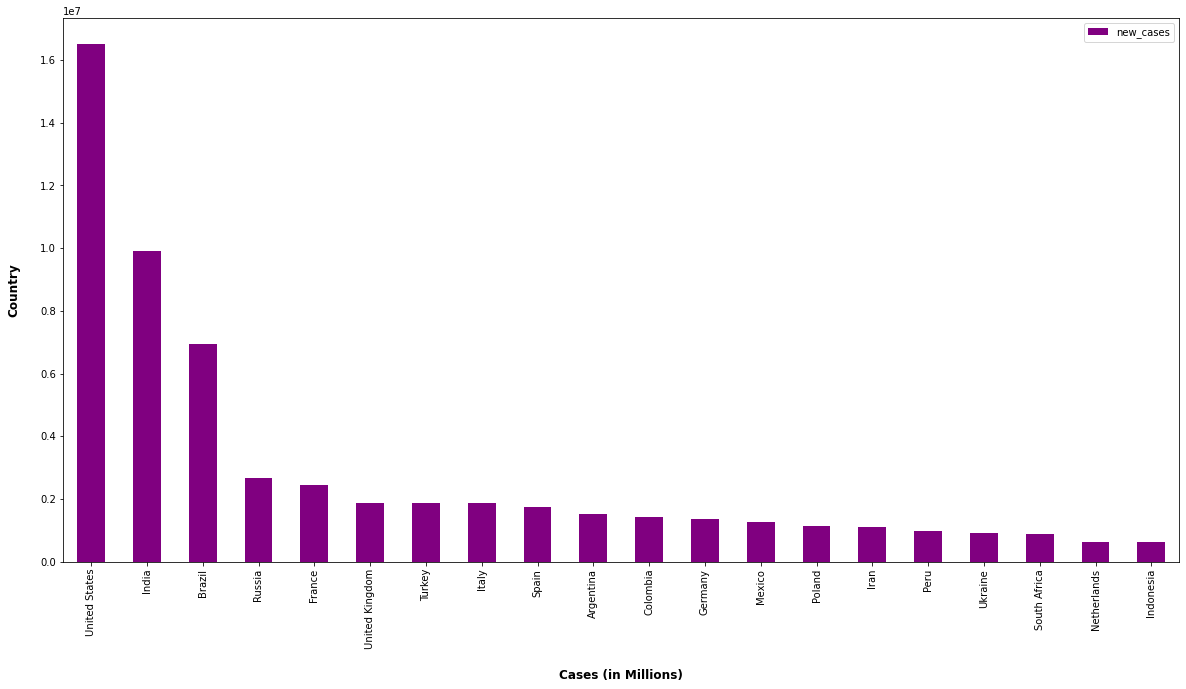

In [75]:
#let us filter our dataframe to exclude th row with the World's total covid-19 cases
# and save it a new dataframe
country = np.where(covid1['country']!='World')
country1 = covid1.loc[country]

# let us find out which 20 countries have recorded the most covid-19 cases
countries = country1.groupby('country')[['new_cases']].sum().sort_values('new_cases', ascending= False).reset_index().head(20)

# let us now plot these countries on a bar graph
x = countries.plot.bar(x='country', y='new_cases', figsize=(20,10), color='#800080')

# Set x-axis label
x.set_xlabel("Cases (in Millions)", labelpad=20, weight='bold', size=12)

  # Set y-axis label
x.set_ylabel("Country", labelpad=20, weight='bold', size=12)

# AFRICA Covid-19 Analysis

In [ ]:
# let us filter our dataset so that we only have African Countries
africa = covid1.loc[covid1['continent']=='Africa']
africa.head()

,iso_code,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,total_tests_per_thousand,positive_rate,population,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities
654,DZA,Africa,Algeria,2020-01-23,NaN,0.0,NaN,0.0,NaN,NaN,NaN,43851043.0,29.1,6.211,3.857,278.364,6.73,83.741
655,DZA,Africa,Algeria,2020-01-24,NaN,0.0,NaN,0.0,NaN,NaN,NaN,43851043.0,29.1,6.211,3.857,278.364,6.73,83.741
656,DZA,Africa,Algeria,2020-01-25,NaN,0.0,NaN,0.0,NaN,NaN,NaN,43851043.0,29.1,6.211,3.857,278.364,6.73,83.741
657,DZA,Africa,Algeria,2020-01-26,NaN,0.0,NaN,0.0,NaN,NaN,NaN,43851043.0,29.1,6.211,3.857,278.364,6.73,83.741
658,DZA,Africa,Algeria,2020-01-27,NaN,0.0,NaN,0.0,NaN,NaN,NaN,43851043.0,29.1,6.211,3.857,278.364,6.73,83.741


In [63]:
# now let us see how covid has spread throughout Africa
fig2 = px.choropleth(africa, locations = 'country', locationmode= 'country names',
                    color = 'total_cases', animation_frame = africa.date.astype(str))
fig2.show()

In [66]:
# let us now see how many cases each Afrcian country has recorded 
african_countries = africa.groupby('country')[['new_cases']].sum().sort_values('new_cases', ascending = False).reset_index()
px.bar(african_countries, x='country', y='new_cases', color='country', title = 'African COVID-19 Cases', log_y=True) 

# Kenya Covid-19 Analysis

In September, the President of Kenya, President Uhuru Kenyatta, relaxed COVID-19 Measures in place by extending the curfew to last from 11PM to 4AM instead of the original 9PM to 5PM. Additionally, he lifted a ban on the sale of alcohol in restaurants and bars which saw these business reopen.
We shall analyse our dataset to see what impact these decisions had on the spread of COVID-19 in Kenya. 

source = https://www.reuters.com/article/us-health-coronavirus-kenya-idUSKBN26J2DL and https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Kenya 

In [ ]:
# let us declare the date of the start of the relaxed measures and a date for several months later
kenya_measures_relaxation_date = '2020-09-01'
kenya_measures_relaxation_date_months_later = '2020-11-30'

In [ ]:
# let us now filter our dataframe to only include covid-19 cases in Kenya
kenya = covid1.loc[covid1['country']=='Kenya']
kenya.head()

,iso_code,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,total_tests,total_tests_per_thousand,positive_rate,population,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities
28857,KEN,Africa,Kenya,2020-01-23,NaN,0.0,NaN,0.0,NaN,NaN,NaN,53771300.0,20.0,2.686,1.528,218.637,2.92,24.651
28858,KEN,Africa,Kenya,2020-01-24,NaN,0.0,NaN,0.0,NaN,NaN,NaN,53771300.0,20.0,2.686,1.528,218.637,2.92,24.651
28859,KEN,Africa,Kenya,2020-01-25,NaN,0.0,NaN,0.0,NaN,NaN,NaN,53771300.0,20.0,2.686,1.528,218.637,2.92,24.651
28860,KEN,Africa,Kenya,2020-01-26,NaN,0.0,NaN,0.0,NaN,NaN,NaN,53771300.0,20.0,2.686,1.528,218.637,2.92,24.651
28861,KEN,Africa,Kenya,2020-01-27,NaN,0.0,NaN,0.0,NaN,NaN,NaN,53771300.0,20.0,2.686,1.528,218.637,2.92,24.651


In [ ]:
# let us see the total cases through the months in Kenya
ke = px.line(kenya , x = 'date', y = 'total_cases')
ke.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date,
    y0=0,
    x1=kenya_measures_relaxation_date,
    y1= kenya['total_cases'].max(),
    line=dict(color='red', width=2)
    )
)
ke.add_annotation(
    dict(
    x = kenya_measures_relaxation_date,
    y = kenya['total_cases'].max(),
    text = "start date of relaxed measures"
    )
)
ke.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date_months_later,
    y0=0,
    x1=kenya_measures_relaxation_date_months_later,
    y1= kenya['total_cases'].max(),
    line=dict(color='orange', width=2)
    )
)
ke.add_annotation(
    dict(
    x = kenya_measures_relaxation_date_months_later,
    y = kenya['total_cases'].max(),
    text = "months later"
    )
)

As we can see from the line graph above, the total cases increased significantly after covid-19 safety measures were relaxed.

In [ ]:
# let us see the total deaths through the months in Kenya
ke1 = px.line(kenya , x = 'date', y = 'total_deaths')
ke1.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date,
    y0=0,
    x1=kenya_measures_relaxation_date,
    y1= kenya['total_deaths'].max(),
    line=dict(color='red', width=2)
    )
)
ke1.add_annotation(
    dict(
    x = kenya_measures_relaxation_date,
    y = kenya['total_deaths'].max(),
    text = "start date of relaxed measures"
    )
)
ke1.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date_months_later,
    y0=0,
    x1=kenya_measures_relaxation_date_months_later,
    y1= kenya['total_deaths'].max(),
    line=dict(color='orange', width=2)
    )
)
ke1.add_annotation(
    dict(
    x = kenya_measures_relaxation_date_months_later,
    y = kenya['total_deaths'].max(),
    text = "months later"
    )
)

As we can see from the line graph above, the total deaths increased significantly after covid-19 safety measures were relaxed.

In [ ]:
# let us see the new cases through the months in Kenya
ke2 = px.line(kenya , x = 'date', y = 'new_cases')
ke2.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date,
    y0=0,
    x1=kenya_measures_relaxation_date,
    y1= kenya['new_cases'].max(),
    line=dict(color='red', width=2)
    )
)
ke2.add_annotation(
    dict(
    x = kenya_measures_relaxation_date,
    y = kenya['new_cases'].max(),
    text = "start date of relaxed measures"
    )
)
ke2.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date_months_later,
    y0=0,
    x1=kenya_measures_relaxation_date_months_later,
    y1= kenya['new_cases'].max(),
    line=dict(color='orange', width=2)
    )
)
ke2.add_annotation(
    dict(
    x = kenya_measures_relaxation_date_months_later,
    y = kenya['new_cases'].max(),
    text = "months later"
    )
)

In [70]:
# let us see the highest number of covid-19 cases that have been recorded in 24 hours Kenya so far.
kenya['new_cases'].max()

1554.0

As we can see from the line graph above, Kenya has recorded varying new cases of Covid-19 after the relaxation of Covid-19 safety measures but there is a clear indication that new cases continued to increase.

In [ ]:
# let us see the new deaths through the months in Kenya
ke3 = px.line(kenya , x = 'date', y = 'new_deaths')
ke3.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date,
    y0=0,
    x1=kenya_measures_relaxation_date,
    y1= kenya['new_deaths'].max(),
    line=dict(color='red', width=2)
    )
)
ke3.add_annotation(
    dict(
    x = kenya_measures_relaxation_date,
    y = kenya['new_deaths'].max(),
    text = "start date of relaxed measures"
    )
)
ke3.add_shape(
    dict(
    type="line",
    x0=kenya_measures_relaxation_date_months_later,
    y0=0,
    x1=kenya_measures_relaxation_date_months_later,
    y1= kenya['new_deaths'].max(),
    line=dict(color='orange', width=2)
    )
)
ke3.add_annotation(
    dict(
    x = kenya_measures_relaxation_date_months_later,
    y = kenya['new_deaths'].max(),
    text = "months later"
    )
)

In [ ]:
# let us see the highest number of covid-19 deaths recorded in a single day in Kenya
kenya['new_deaths'].max()

41.0

As we can see from the line graph above, Kenya has recorded varying new deaths from Covid-19 after the relaxation of Covid-19 safety measures but there is a clear indication that the number of deaths have increased.

# Conclusion

From the analysis above it is clear to see that Covid-19 has spread throughout the world.

The top 20 countries with the most recorded number of Covid-19 cases are:
1. United States-	16518486
2. India	-9906165
3. Brazil-	6927145
4. Russia-	2656601
5. France-	2433859
6. United Kingdom-	1874867
7. Turkey	-1866345
8. Italy	-1855737
9. Spain	-1751884
10. Argentina-	1503222
11.	Colombia-	1434516
12. Germany-	1357261
13. Mexico	-1255974
14.	Poland	-1140572
15.	Iran-	1115770
16.	Peru-	984973
17.	Ukraine-	925321
18.	South Africa-	866127
19.	Netherlands-	632085
20.	Indonesia	623309

When it comes to Kenya, we can see that after the Covid-19 safety measures were relaxed in September, 2020, there has been a significant increase in new cases, total cases and deaths. Therefore, we can conclude that the relaxation of these measures has impacted Kenya negatively. 